In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pylab as plt

from skimage import draw, measure
from IPython.display import FileLink
import label_wrapper
import tensorflow as tf
tf.enable_v2_behavior()

# Create a labeling document

Let's start by creating a labeling document with a single image and open it by clicking the link.

In [2]:
image_files = ['example_1.jpg', 'example_2.png']

labeling_document_no_labeles = 'no_labels.html'

image_set = label_wrapper.ImageSet().add_images(image_files)
image_set.create_via(labeling_document_no_labeles)

FileLink(labeling_document_no_labeles)

/home/rok/Documents/Documents/datatart/label-wrapper/examples/no_labels.html

In the labeling document we can create annotations by manually drawing shapes and export as json them by selecting **Annotations / Export Annotations (as json)** in the top menu of the annotation tool.

The annotation tool we're using is [VIA](http://www.robots.ox.ac.uk/~vgg/software/via/).

# Load labeles and visualise them

Once we have a labeled dataset we want to use images and json annotations to create a set of images and image masks and use them for training. We do this by loading the json file and exporting it to a practical file format. Here we use tfrecords.

In [3]:
created_json = 'via_region_data.json'
tf_records_filepath = './test.tfrecords'

labeled_image_set = label_wrapper.ImageSet().load_json(created_json)
labeled_image_set.export(tf_records_filepath)

We can load and view the created images and image masks dataset:

Instructions for updating:
Colocations handled automatically by placer.


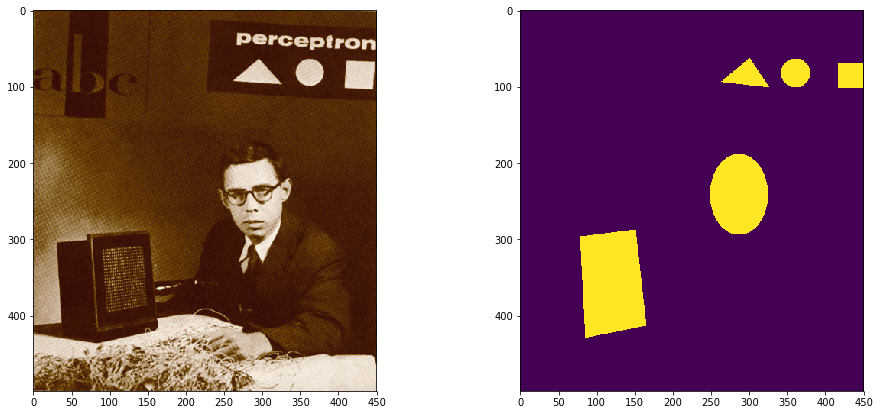

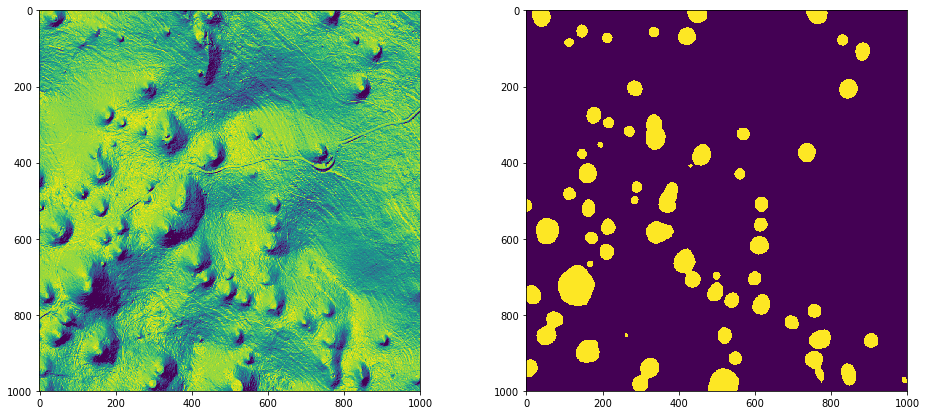

In [4]:
for fileref, image, mask in label_wrapper.io._tfrecord_decoder(tf_records_filepath):
    fig = plt.figure(figsize=(16,7))
    
    fig.add_subplot(1,2,1)
    image = np.squeeze(image)
    plt.imshow(image)
    
    fig.add_subplot(1,2,2)
    plt.imshow(mask)

# Training and inference

Here we first run training and then inference on the exported `tfrecords` dataset.
We store it to a new tfrecords file.

This is not done in this notebook.

# Inference review

We now want to review the inferece results. We do this by converting binary masks to polygons and creating a labeling document for review.

In [5]:
extracted_via_inference_generation_0 = 'recognized_labels.html'
tf_records_generation_0_filepath = './test.tfrecords'

imported_image_set = label_wrapper.ImageSet().import_labels(tf_records_generation_0_filepath)
imported_image_set.create_via(extracted_via_inference_generation_0)

FileLink(extracted_via_inference_generation_0)

/home/rok/Documents/Documents/datatart/label-wrapper/examples/recognized_labels.html

# Repeat

We can now cycle training, infering, reviewing and adding more images until we reach the stage where no more review is inference review is required for new images.